# Time Span of Distributed Intermittent Systems 

### 1- Spatially diverse (independent Power cycles)
If the nodes are spatially diverse such that their energy harvesting rates are statistically different, then we can assume that the power cycles of the nodes are independent and uniformlly distributed over the overall system's power cycle---When all the nodes wake up and go into sleep mode again. 
When the power cycles are uniformlly distributed the additionally average time span gained by adding a node can be calculated as follows, 
\begin{equation}
\delta t = \frac{t_{off}}{s_{pc}} * n_{on}
\end{equation}


where $t_{off}$ is the distributed system off time, $s_{pc}$ is the total time span of the distributed system's power cycle, and $n_o$ is a node on time. 



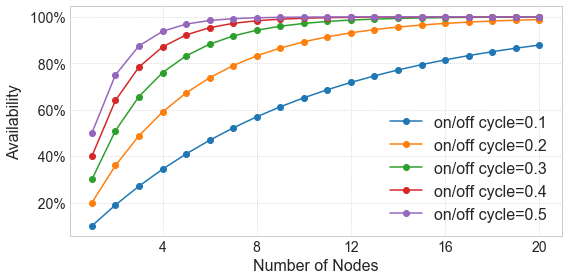

In [5]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

# ```
# ndc = X ; a random variable drown from a normal distribution with a mean of $O_c$ and std of $whatever$
# N = number of nodes
# tot= 0  # total on time

# for (n =0; n < N; n++)
#     tot = (1 - tot) * ndc + t
# ```

fontSize = 16 

ndc=0.1
n=20

# the average benefit of adding an INode is tot = (1-tot) * ndc +tot

def tot(n,ndc):
    assert (n >0 and ndc <= 1)
    t=0
    coverage=[]
    for i in range(n):
#         t = (1 - t) * (np.random.randn() * (ndc/4.) + ndc) +t
        t = (1 - t) * ndc +t
        coverage.append(t)
#         if i % 10 == 0:
#             print(t)
    return coverage
    
fig, ax1 = plt.subplots(figsize=(8,4))
    
for ndc in np.arange(0.1,0.6,0.1):
    ax1.plot(range(1,n+1), tot(n,ndc), '-o', label="on/off cycle={:0.1f}".format(ndc))

ax1.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0,21,4)))
# 
#Format the x axis labels

y1Locs = np.arange(-0,2+0.1,step=0.1)
y1Value = np.around(np.arange(0,2+0.1,step=0.1), decimals=1)

def funcFormatter(val, idx):
    return "{:4d}%".format(int(val*100))

ax1.grid(linestyle=':')
ax1.legend( fontsize=fontSize)
plt.xlabel('Number of Nodes',  fontsize=fontSize)
plt.ylabel('Availability',  fontsize=fontSize)

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(funcFormatter))

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('figures/cisModel.eps')

## 2- Spatially invariant (dependent power cycles)
if the nodes are located close to each other such that their energy charging rates are relativelly the same, then the wakeup intervals of the nodes tend to overlap and cluster around a certain point on the power cycle of the distributed system. 

### 2.1 Repeated draw from a distribution inrespective of the length of the previous on time of a node

### 2.2 Draw from a distribution with respect to the length of the previous on time of a node. 

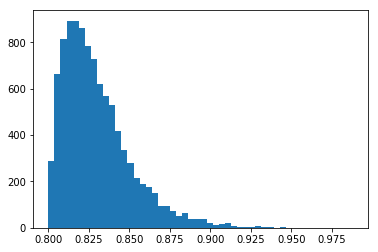

In [533]:
plt.hist(0.8 + np.random.gamma(scale=.015, shape=2, size=(10000,))  , bins=50)
# plt.hist(np.random.normal(loc=1, scale=0.025, size=(10000,)), bins=50)
# np.random.gamma(scale=(1/20), shape=2)
plt.show()

range: 0.06356077406963345
0.06356077406963345


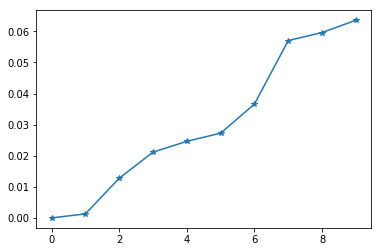

In [530]:

meanDutyCycle = 0.1
numbNodes=10
numInters = 1

def calDis(arr,d):
    """arr is an array sorted in a ascending order"""
    covDis=0  # covered distance
#     print("arr:" , len(arr))
    for i in range(len(arr)-1):
        dif = (arr[i+1] - arr[i]) 
        
        if  dif < d:
            covDis += dif 
        else:
             covDis+=d
    return covDis
            
times=np.zeros(numbNodes)  

for i in range(numInters):
    ontimes = np.random.gamma(scale=.01, shape=2, size=(numbNodes)) 
    offtimes = np.random.gamma(scale=.025, shape=2, size=(numbNodes)) + (1- meanDutyCycle)
    times += ontimes + offtimes
    times -=np.min(times)

times = np.sort(times)
# print(times)
print('range:', np.max(times) - np.min(times))
print(calDis(times, meanDutyCycle))
plt.plot(times, '-*')
plt.show()

### consider the relation between the on and off time (when the on time is long the off time is short)

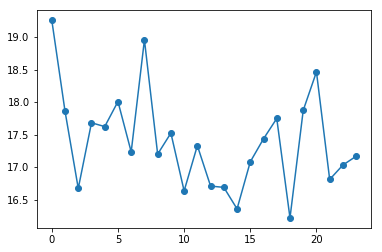

In [528]:
meanDutyCycle = 0.1
numInters = 1000
coverage=[]

def calDis(arr,d):
    """arr is an array sorted in a ascending order"""
    covDis=0  # covered distance
#     print("arr:" , len(arr))
    for i in range(len(arr)-1):
        dif = (arr[i+1] - arr[i]) 
        
        if  dif < d:
            covDis += dif 
        else:
             covDis+=d
    return covDis
            
    
for numNodes in range(4,100,4):
    times=np.random.gamma(scale=.025, shape=2, size=(numbNodes))   # wake up times (longer time less energy)
    
    for i in range(numInters):
        m = np.mean(times)
        ## adding ontime 
        for j, atime in enumerate(times): 
            if  atime < m:    # long offtime -> short on time
                times[j]+=  meanDutyCycle + np.random.gamma(scale=.001, shape=1) 
            else:
                times[j]+= meanDutyCycle + np.random.gamma(scale=.01, shape=2) 

        m = np.mean(times)   
        ## adding offtime
        for j, atime in enumerate(times):
            if  atime > m:    # long ontime -> short off time
                times[j]+=  ((1- meanDutyCycle * 2) - np.random.gamma(scale=.025, shape=2))  * 0.005 * j
            else:
                times[j]+=  ((1- meanDutyCycle) + np.random.gamma(scale=.025, shape=2)) 
        times -=np.min(times)
    coverage.append(calDis(np.sort(times), meanDutyCycle))

plt.plot(coverage, '-o')

### Plotting the distribution of the nodes wake ups (assuming a constant load)

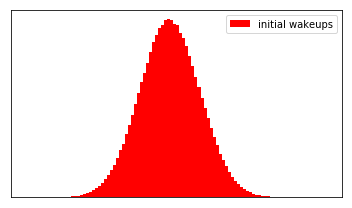

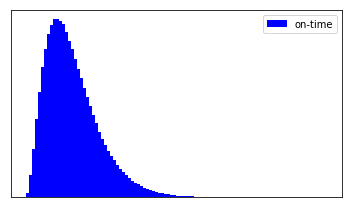

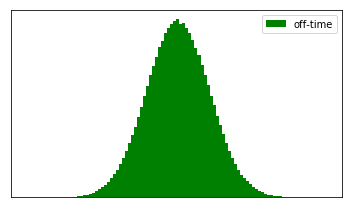

In [102]:
import scipy.stats as stats 

meanDutyCycle = 0.1
numbNodes = 1000000
numBins = 100

# initial nodes wake ups distribution 
initialWakeupsDis = np.random.normal(scale=.1, loc=2, size=(numbNodes))  # longer time means less energy
fig1 = plt.figure(figsize=(5,3))
plt.hist(initialWakeupsDis, label='initial wakeups', bins=numBins, color='r')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
# plt.xlim([0,0.3])
plt.legend()
plt.tight_layout()
plt.savefig('../figures/wakeups.pdf')

onTimeConstLoadDis = meanDutyCycle + np.random.gamma(scale=.005, shape=3, size=(numbNodes)) 
fig2 = plt.figure(figsize=(5,3))
plt.hist(onTimeConstLoadDis, label='on-time', bins=numBins, color='b')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
# plt.xlim([0.1,0.4])
plt.legend()
plt.tight_layout()
plt.savefig('../figures/ontime.pdf')

offTimeDis = np.random.normal(scale=.05, loc=(1-meanDutyCycle), size=(numbNodes)) 
fig3 = plt.figure(figsize=(5,3))
plt.hist(offTimeDis, label='off-time', bins=numBins, color='g')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
# plt.xlim([0.1,0.4])
plt.legend()
plt.tight_layout()
plt.savefig('../figures/offtime.pdf')

plt.show()


# x = np.linspace (-2, 2, 200) 
# y = stats.gamma.pdf(x, a=.1, loc=.1) #a is alpha, loc is beta???

# plt.plot(x, y, "y-", label=(r'$\alpha=XX, \beta=XX$')) 

# x = np.linspace (.5, 1.5, 200) 
# ynorm = stats.norm.pdf(x, 1,.1) #a is alpha, loc is beta???

# plt.plot(x, ynorm, "g-", label=(r'$\alpha=X, \beta=X$')) 
# # plt.xlim([0.09,0.2])
# plt.tight_layout()

## Streching the Distribution

In [76]:
import numpy as np
import matplotlib.pyplot as plt

meanDutyCycle = 0.1
numInters = 10
numNodes =  100

vals = np.random.normal(scale=.1, loc=1, size=(numNodes))
nodesDis=np.copy(vals)
stretchedNodesDis=np.copy(vals)

nodesCov=[]
stretchedNodesCov=[]


def calDis(arr,d):
    """arr is an array sorted in a ascending order"""
    covDis=0  # covered distance
#     print("arr:" , len(arr))
    for i in range(len(arr)-1):
        dif = (arr[i+1] - arr[i]) 
        
        if  dif < d:
            covDis += dif 
        else:
             covDis+=d
    return covDis


      
for i in range(numInters):
    for n in range(numNodes):
        val = np.random.normal(scale=.1, loc=0)
        nodesDis[n]+=val  # longer time means less energy
#         stretchedNodesDis[n]+=(val+ n * 1./numNodes)
        stretchedNodesDis[n]+=(val+ np.random.uniform(0,.5))
    
#     print(np.std(nodesDis))
#     print(np.std(stretchedNodesDis))
    nodesCov.append(calDis(np.sort(nodesDis), meanDutyCycle))
    stretchedNodesCov.append(calDis(np.sort(stretchedNodesDis), meanDutyCycle))

print(np.std(nodesCov))
print(np.std(stretchedNodesCov))


0.26058886898915745
0.3928544611390301


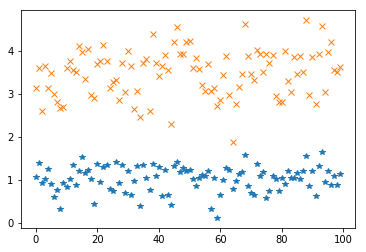

In [68]:
plt.plot(nodesDis, '*')
plt.plot(stretchedNodesDis, 'x')


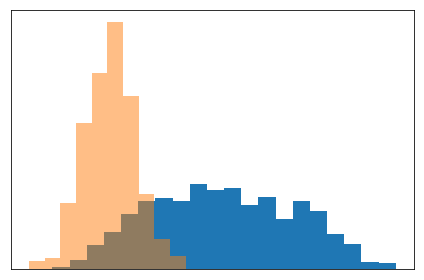

In [107]:
vals = np.random.normal(scale=.1, loc=1, size=(numNodes*10))
norms = np.random.uniform(0,.9, size=(numNodes*10))
plt.hist(vals + norms, bins=20)
plt.hist(vals, alpha = 0.5)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig('../figures/spreading.pdf')
plt.show()

## The probability of maximum and minimum span

 
0.9
 
0.7200000000000001
 
0.504
 
0.3024
 
0.1512
 
0.060479999999999985
 
0.01814399999999999
 
0.003628799999999997
 
0.0003628799999999996


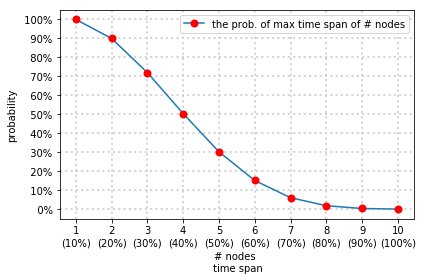

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline

class Node(object):
    def __init__(self, value, prob): # a node
        self.value = value
        self.prob  = prob
        self.leftBranch = None
        self.rightBranch = None
        self.parent = None 
        
    def setLeftBranch(self, node): # attributes of a node
        self.leftBranch = node
    def setRightBranch(self, node):
        self.rightBranch = node
    def setParent(self, parent):
        self.parent = parent
        
    def getValue(self): # attributes of a node
        return self.value
    def getProb(self): # attributes of a node
        return self.prob
    def getLeftBranch(self):
        return self.leftBranch
    def getRightBranch(self):
        return self.rightBranch
    def getParent(self):
        return self.parent
    def __str__(self):
        return (self.value, self.prob)
    

def addNodes(parent):
    parent.setLeftBranch(Node(parent.getValue(),  parent.getProb()*parent.getValue() * 0.1 ) )
    parent.setRightBranch(Node(parent.getValue()+1, (parent.getProb()) * (1- parent.getValue()* 0.1) ))
    return (parent.getLeftBranch(),parent.getRightBranch())

root = Node(1,1.0)

probs=[root.getProb()]
l1 = [root]
l2 = []
for i in range(9): 
    for n in l1:
        chs = addNodes(n)
#         print('({:d}|{:0.3f})'.format(chs[0].getValue(),chs[0].getProb()) , end=" " )
#         print('({:d}|{:0.3f})'.format(chs[1].getValue(),chs[1].getProb()) , end=" " )
        l2.append(chs[0])
        l2.append(chs[1])
    l1 = l2[:]
    l2 = []
    print(' ')
    print(chs[-1].getProb())
    probs.append(chs[-1].getProb())

fig, ax1 = plt.subplots()

ax1.plot(probs, marker='o', 
         markerfacecolor='r',
         markeredgecolor="none",
         markersize=8,
         label="the prob. of max time span of # nodes")  
ax1.set_ylabel('probability')
ax1.set_xlabel('# nodes \n time span')

ax1.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0,10)))

#Format the x axis labels
xLabels = ["{}\n({}%)".format(x,10*x) for x in np.arange(1,11)]
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(xLabels))

y1Locs = np.arange(-0,1.1,step=0.1)
y1Value = np.around(np.arange(0,1.1,step=0.1), decimals=1)
y1Values = [ "{:4d}%".format(int(x*100)) for x in y1Value]

ax1.yaxis.set_major_locator(ticker.FixedLocator(y1Locs))
ax1.yaxis.set_major_formatter(ticker.FixedFormatter(y1Values))

ax1.grid(color='lightgrey', linestyle=':', linewidth=2)
ax1.legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/amjad/Documents/projects/MicDir/prewriting/IModeling/figures/maxTimeSpanModel.pdf')
plt.show()

## Maximum Coverage Probability

0.5


IndexError: tuple index out of range

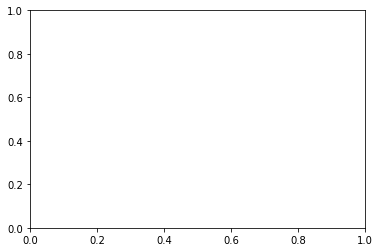

In [68]:
import math as m

def maxCoverageProb(nd,dc):
    assert(nd <= 1./dc)
    mcp = 1 # max coverage probability
    prob=[]
    for n in range(1,nd+1):
        mcp = (1-(n-1)* dc ) * mcp
        prob.append(mcp)
#         print(prob)
    return prob


ns = 2  # number of slots

fig, ax1 = plt.subplots()

for ns in range(2,3):
    dc = 1./ns
    print(dc)
    ax1.plot(range(1,ns+1), maxCoverageProb(ns, dc), '-o', label="Duty cycle={:0.1f}".format())
    
ax1.grid(linestyle=':')
ax1.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Coverage')

ax1.yaxis.set_major_locator(ticker.FixedLocator(y1Locs))
ax1.yaxis.set_major_formatter(ticker.FixedFormatter(y1Values))
plt.tight_layout()
plt.savefig('../figures/MaxCoverageProb.pdf')


## Minimum Coverage Probability

In [224]:
# mcp = 1 
# dc=.1
# for i in range(1,11):
#     mcp = dc**(i-1)
#     print(mcp)

In [51]:
help( np.random.uniform)

Help on built-in function uniform:

uniform(...) method of mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        